In [1]:
!pip3 install scikit-learn

In [2]:
!pip3 install torch

In [4]:
!pip3 install torchmetrics

  Using cached torchmetrics-1.7.3-py3-none-any.whl.metadata (21 kB)
  Using cached lightning_utilities-0.14.3-py3-none-any.whl.metadata (5.6 kB)
Using cached torchmetrics-1.7.3-py3-none-any.whl (962 kB)
Using cached lightning_utilities-0.14.3-py3-none-any.whl (28 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [5]:
!pip3 install pandas

  Using cached pandas-2.3.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.0-cp312-cp312-macosx_10_13_x86_64.whl (11.6 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


In [6]:
!pip3 install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-macosx_10_13_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp312-cp312-macosx_10_13_x86_64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.3.0-cp312-cp312-macosx_10_13_x86_64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp312-cp312-macosx_10_13_x86_64.whl (8.2 MB)
Using cached contourpy-1.3.2-cp312-cp312-macosx_10_13_x86_64.whl (271 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp312-cp312-macosx_10_13_x86_64.whl (2.3 MB)
Using cached kiwisolver-1.4.8-cp312-cp312-macos

In [3]:
import torch
torch.__version__

'2.2.2'

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [5]:
insurance_data = pd.read_csv("insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_data.shape

(1338, 7)

In [7]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: xlabel='charges', ylabel='Count'>

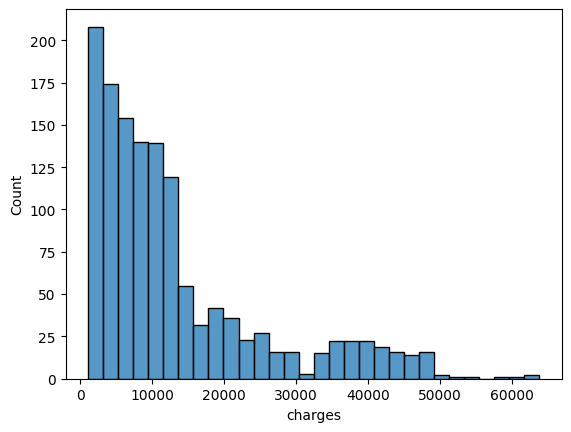

In [8]:
sns.histplot(insurance_data["charges"])

<Axes: xlabel='smoker', ylabel='charges'>

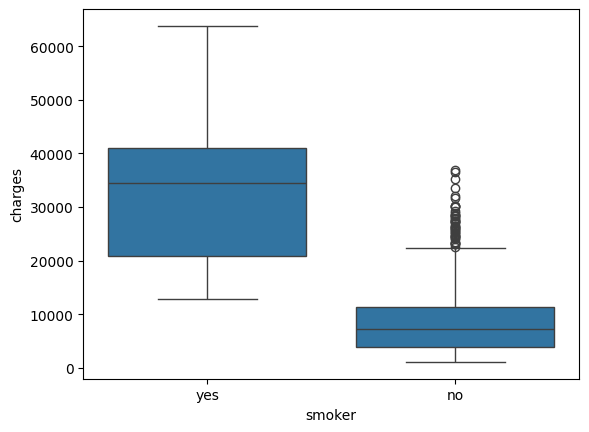

In [13]:
sns.boxplot(y = insurance_data["charges"], x = insurance_data["smoker"])

<Axes: xlabel='age', ylabel='charges'>

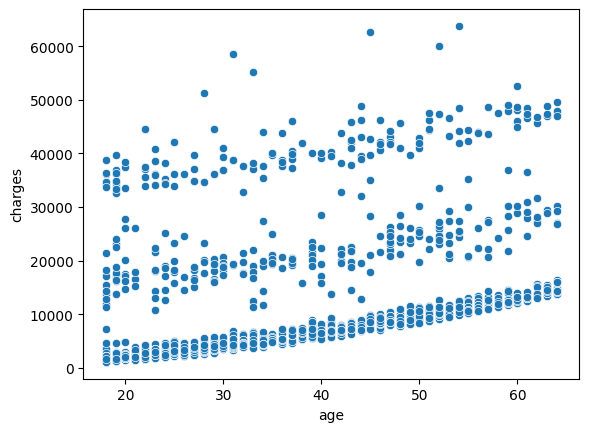

In [14]:
sns.scatterplot(y = insurance_data["charges"], x = insurance_data["age"])

In [9]:
x = insurance_data.drop(columns = ["charges"])
y = insurance_data["charges"]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state = 123)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1070, 6), (268, 6), (1070,), (268,))

In [10]:
categorical_features = ["sex", "smoker", "region"]
categorical_transformer = OneHotEncoder(
    handle_unknown = "ignore", drop = "first", sparse_output = False
)
preprocessor = ColumnTransformer(
    transformers = [("cat_tr", categorical_transformer, categorical_features)],
    remainder = "passthrough"
)

In [11]:
x_train = preprocessor.fit_transform(x_train)
x_val = preprocessor.transform(x_val)

x_train.shape, x_val.shape

((1070, 8), (268, 8))

In [12]:
print(x_train)

[[ 1.     0.     1.    ... 40.    26.315  1.   ]
 [ 0.     1.     0.    ... 37.    38.39   0.   ]
 [ 1.     0.     0.    ... 50.    26.6    0.   ]
 ...
 [ 0.     0.     0.    ... 19.    28.4    1.   ]
 [ 1.     0.     0.    ... 18.    23.085  0.   ]
 [ 0.     1.     1.    ... 53.    36.86   3.   ]]


In [13]:
pd.DataFrame(x_train, columns = preprocessor.get_feature_names_out()).T

,0,1,2,3,4,5,6,7,8,9,...,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069
cat_tr__sex_male,1.000,0.00,1.0,1.000,0.0,1.0,0.0,1.00,1.00,0.00,...,1.00,0.00,1.00,0.00,0.0,1.000,0.00,0.0,1.000,0.00
cat_tr__smoker_yes,0.000,1.00,0.0,0.000,0.0,0.0,0.0,0.00,1.00,0.00,...,0.00,0.00,1.00,0.00,0.0,0.000,0.00,0.0,0.000,1.00
cat_tr__region_northwest,1.000,0.00,0.0,0.000,0.0,0.0,0.0,0.00,0.00,1.00,...,0.00,1.00,0.00,1.00,0.0,0.000,1.00,0.0,0.000,1.00
cat_tr__region_southeast,0.000,1.00,0.0,0.000,0.0,1.0,0.0,1.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.0,0.000,0.00,0.0,0.000,0.00
cat_tr__region_southwest,0.000,0.00,1.0,0.000,1.0,0.0,1.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.0,0.000,0.00,1.0,0.000,0.00
remainder__age,40.000,37.00,50.0,46.000,21.0,59.0,48.0,32.00,26.00,33.00,...,58.00,28.00,39.00,21.00,54.0,37.000,20.00,19.0,18.000,53.00
remainder__bmi,26.315,38.39,26.6,24.795,17.4,26.4,28.9,37.18,27.06,42.94,...,32.01,34.77,26.41,35.72,30.8,22.705,31.92,28.4,23.085,36.86
remainder__children,1.000,0.00,0.0,3.000,1.0,0.0,0.0,2.00,0.00,3.00,...,1.00,0.00,0.00,0.00,3.0,3.000,0.00,1.0,0.000,3.00


In [14]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_train[:10]

array([ 6389.37785, 40419.0191 ,  8444.474  ,  9500.57305,  2585.269  ,
       11743.299  ,  8277.523  ,  4673.3922 , 17043.3414 ,  6360.9936 ])

In [15]:
y_train[:10]

array([ 6389.37785, 40419.0191 ,  8444.474  ,  9500.57305,  2585.269  ,
       11743.299  ,  8277.523  ,  4673.3922 , 17043.3414 ,  6360.9936 ])

In [16]:
stdscaler = StandardScaler()
x_train = stdscaler.fit_transform(x_train)
x_val = stdscaler.transform(x_val)
print(x_train)

[[ 0.98884723 -0.5         1.72132593 ...  0.06207177 -0.71961
  -0.06736631]
 [-1.01127855  2.         -0.5809475  ... -0.15057538  1.28697921
  -0.8864794 ]
 [ 0.98884723 -0.5        -0.5809475  ...  0.77089561 -0.67224951
  -0.8864794 ]
 ...
 [-1.01127855 -0.5        -0.5809475  ... -1.42645829 -0.37313062
  -0.06736631]
 [ 0.98884723 -0.5        -0.5809475  ... -1.49734067 -1.25636223
  -0.8864794 ]
 [-1.01127855  2.          1.72132593 ...  0.98354276  1.03272816
   1.57085987]]


In [17]:
y_train.reshape(-1, 1)

array([[ 6389.37785],
       [40419.0191 ],
       [ 8444.474  ],
       ...,
       [ 2331.519  ],
       [ 1704.70015],
       [46661.4424 ]])

In [18]:
min_max_scaler = MinMaxScaler()
y_train = min_max_scaler.fit_transform(y_train.reshape(-1,1))
y_val = min_max_scaler.transform(y_val.reshape(-1,1))

In [19]:
train_inputs = torch.from_numpy(x_train).float()
train_targets = torch.from_numpy(y_train.reshape(-1,1)).float()

train_inputs.shape, train_targets.shape

(torch.Size([1070, 8]), torch.Size([1070, 1]))

In [20]:
class SimpleNeuralNet(nn.Module):
    # initialize the layers
    def __init__(self, num_features):
        super().__init__()
        self.linear1 = nn.Linear(num_features, 1)
        
    # perform the computation
    def forward(self, x):
        x = self.linear1(x)
        return x

In [21]:
model = SimpleNeuralNet(num_features=8)

print(model)

SimpleNeuralNet(
  (linear1): Linear(in_features=8, out_features=1, bias=True)
)


In [22]:
for layer in model.children():
    if isinstance(layer, nn.Linear):
        print(layer.state_dict()["weight"])
        print(layer.state_dict()["bias"])

tensor([[-0.3421, -0.1348, -0.3250, -0.2178, -0.1552,  0.0056,  0.0236, -0.1156]])
tensor([0.2285])


In [23]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model)

9

In [24]:
import torch.nn.functional as F

loss_fn = F.mse_loss

In [27]:
loss = loss_fn(model(train_inputs), train_targets)

print(loss)

tensor(0.3137, grad_fn=<MseLossBackward0>)


In [28]:
preds = model(train_inputs)

preds

tensor([[-0.3902],
        [ 0.3602],
        [ 0.0893],
        ...,
        [ 0.6737],
        [ 0.4313],
        [-0.1858]], grad_fn=<AddmmBackward0>)

In [30]:
from torchmetrics.regression import R2Score
from torchmetrics.regression import MeanSquaredError

MSE = MeanSquaredError()
r2score = R2Score()

print("Mean Squared Error: ", MSE(preds, train_targets).item())
print("R^2 : ", r2score(preds, train_targets).item())

Mean Squared Error:  0.3136635422706604
R^2 :  -7.178620338439941


In [31]:
from torch.utils.data import TensorDataset, DataLoader
train_ds = TensorDataset(train_inputs, train_targets)
train_ds[:5]

(tensor([[ 0.9888, -0.5000,  1.7213, -0.6213, -0.5478,  0.0621, -0.7196, -0.0674],
         [-1.0113,  2.0000, -0.5809,  1.6095, -0.5478, -0.1506,  1.2870, -0.8865],
         [ 0.9888, -0.5000, -0.5809, -0.6213,  1.8254,  0.7709, -0.6722, -0.8865],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478,  0.4874, -0.9722,  1.5709],
         [-1.0113, -0.5000, -0.5809, -0.6213,  1.8254, -1.2847, -2.2011, -0.0674]]),
 tensor([[0.0857],
         [0.6393],
         [0.1191],
         [0.1363],
         [0.0238]]))

In [32]:
batch_size = 8
# shuffle - flag to shuffle the data from input instead of any predictable manner
train_dloader = DataLoader(train_ds, batch_size, shuffle = True)
# data loader is iterable
# print the next of of first batch
next(iter(train_dloader))

[tensor([[-1.0113, -0.5000, -0.5809, -0.6213,  1.8254,  0.3456, -0.8052, -0.0674],
         [-1.0113, -0.5000, -0.5809, -0.6213, -0.5478,  1.2671,  0.6065,  0.7517],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478,  1.4797,  1.0485, -0.8865],
         [-1.0113, -0.5000, -0.5809, -0.6213, -0.5478, -0.0797, -1.7773,  0.7517],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478,  0.4874, -0.9722,  1.5709],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478,  1.1253,  0.7644, -0.0674],
         [ 0.9888, -0.5000, -0.5809, -0.6213,  1.8254,  0.0621, -0.1239,  0.7517],
         [-1.0113, -0.5000, -0.5809,  1.6095, -0.5478,  1.6924,  1.0311, -0.8865]]),
 tensor([[0.1058],
         [0.1969],
         [0.1890],
         [0.0978],
         [0.1363],
         [0.1671],
         [0.0891],
         [0.2077]])]

In [33]:
# lets do the same for validation data now
# first change validation data into tensor format
val_inputs = torch.from_numpy(x_val).float()
val_targets = torch.from_numpy(y_val.reshape(-1, 1)).float()
# instantiate the dataset for val data now
val_ds = TensorDataset(val_inputs, val_targets)

val_ds[:5]

(tensor([[-1.0113, -0.5000, -0.5809,  1.6095, -0.5478,  0.7000,  1.9999,  0.7517],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478, -0.5050,  1.1117, -0.0674],
         [-1.0113,  2.0000, -0.5809, -0.6213,  1.8254, -0.8594,  0.1254, -0.8865],
         [ 0.9888, -0.5000,  1.7213, -0.6213, -0.5478, -0.2923, -1.0827, -0.0674],
         [ 0.9888, -0.5000, -0.5809,  1.6095, -0.5478,  1.4797, -0.8152, -0.8865]]),
 tensor([[0.1412],
         [0.0577],
         [0.5485],
         [0.0651],
         [0.1793]]))

In [35]:
# instantiate the data loader
# no need to specify the shuffle = True, the validation data are used
# for evaluating the model, doesn't need shuffling
val_dloader = DataLoader(val_ds, batch_size)
# first batch of records from validation data
next(iter(val_dloader))

[tensor([[-1.0113, -0.5000, -0.5809,  1.6095, -0.5478,  0.7000,  1.9999,  0.7517],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478, -0.5050,  1.1117, -0.0674],
         [-1.0113,  2.0000, -0.5809, -0.6213,  1.8254, -0.8594,  0.1254, -0.8865],
         [ 0.9888, -0.5000,  1.7213, -0.6213, -0.5478, -0.2923, -1.0827, -0.0674],
         [ 0.9888, -0.5000, -0.5809,  1.6095, -0.5478,  1.4797, -0.8152, -0.8865],
         [-1.0113, -0.5000, -0.5809,  1.6095, -0.5478,  0.7709, -0.4130,  1.5709],
         [ 0.9888, -0.5000, -0.5809, -0.6213, -0.5478, -0.8594, -1.9510,  1.5709],
         [-1.0113, -0.5000, -0.5809, -0.6213,  1.8254, -0.4341, -2.0183, -0.0674]]),
 tensor([[0.1412],
         [0.0577],
         [0.5485],
         [0.0651],
         [0.1793],
         [0.1559],
         [0.0603],
         [0.0593]])]

In [36]:
# create a dictionary for recording the training and validation
# loss for each epoch (one pass through the entire training data)
loss_stats = {
    "train": [],
    "val": []
}
# number of epochs
num_epochs = 100

In [50]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [51]:
# instantiate the model
model = SimpleNeuralNet(num_features=8).to(device)

print(model)

SimpleNeuralNet(
  (linear1): Linear(in_features=8, out_features=1, bias=True)
)


In [52]:
# user torch's optimizer to update the model parameters using
# gradient values. e.g. stochastic gradient descent optimizer (SGD)
# SGD is one of the many optimizers available in pytorch
# Pass model parameters and learning rate (10^-2) to optimizer
# Learning rate determines the step size for how the model parameters
# converge to their optimal values.
# Too large the step size, the model may not converge
# Too small the learning rate/ step size, the model may take too long to converge
# 1e-2 == 0.01 - convenient for this model
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)

In [70]:
# set up training loop for the model
# most of these boilerplate codes will not be required when
# using pytorch-lightening

# iterate through the number of epochs
for epoch in range(num_epochs):
    # set training loss to 0 for every epoch
    train_epoch_loss = 0
    # set the model to training mode
    # in the training mode, gradients are computed so that the model
    # parameters can be updated using those gradients.
    # gradient - partial derivates of the loss function with respect to individual model parameters
    # these partial derivates are used to determine how model parameters can be tweaked to minimize the loss function
    model.train()

    # iterate through each batch of the training data
    for x_train_batch, y_train_batch in train_dloader:
        optimizer.zero_grad()

        # move data to the same device as the model
        x_train_batch, y_train_batch = \
        x_train_batch.to(device), y_train_batch.to(device)

        # generate predictions and compare the loss - forward pass
        preds = model(x_train_batch)

        train_loss = loss_fn(preds, y_train_batch)

        # perform gradient descent - gradients are computed
        train_loss.backward()
        # the computed gradients are used to tweak the model parameter values
        optimizer.step()

        # add the training loss to the epoch loss
        train_epoch_loss += train_loss.item()

    # VALIDATION
    with torch.no_grad():

        val_epoch_loss = 0

        model.eval()

        for x_val_batch, y_val_batch in val_dloader:
            x_val_batch, y_val_batch = x_val_batch.to(device), y_val_batch.to(device)

            y_val_pred = model(x_val_batch)

            val_loss = loss_fn(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()

        train_loss = train_epoch_loss / len(train_dloader)
        val_loss = val_epoch_loss / len(val_dloader)

        loss_stats["train"].append(train_loss)
        loss_stats["val"].append(val_loss)

        print(f"Epoch {epoch+0.01}: | Train Loss: {train_loss:.3f} | Val Loss: {val_loss:.3f}")

Epoch 0.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 1.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 2.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 3.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 4.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 5.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 6.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 7.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 8.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 9.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 10.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 11.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 12.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 13.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 14.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 15.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 16.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 17.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 18.01: | Train Loss: 0.010 | Val Loss: 0.008
Epoch 19.01: | Train Loss: 0.010 | Val Lo

In [71]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats). \
    reset_index().melt(id_vars = ["index"]). \
    rename(columns = {"index": "epochs"})

train_val_loss_df.head()

,epochs,variable,value
0,0,train,0.111082
1,1,train,0.01315
2,2,train,0.010774
3,3,train,0.010332
4,4,train,0.010257


In [72]:
train_val_loss_df.tail()

,epochs,variable,value
595,295,val,0.008257
596,296,val,0.008204
597,297,val,0.008047
598,298,val,0.008115
599,299,val,0.008067


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   epochs    600 non-null    int64 
 1   variable  600 non-null    object
 2   value     600 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB
None


TypeError: len() of a 0-d tensor

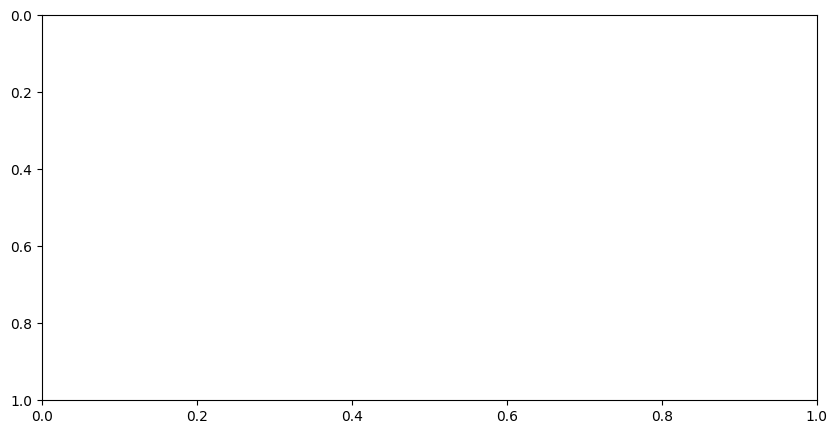

In [73]:
plt.figure(figsize = (10, 5))
print(type(train_val_loss_df))
print(train_val_loss_df.info())
sns.lineplot(data = train_val_loss_df,
             x = "epochs", y = "value",
             hue = "variable"
).set_title("Train-Val Loss vs Epoch")